In [12]:
cd /content/drive/MyDrive/IBM

/content/drive/MyDrive/IBM


In [13]:
!unzip /content/drive/MyDrive/IBM/Flowers-Dataset.zip

Archive:  /content/drive/MyDrive/IBM/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
flowers_datagen = ImageDataGenerator(rescale= 1./225,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [15]:
flowers_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
a_flowers = flowers_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM/flowers",target_size=(256, 256),
                                                class_mode='categorical', batch_size=32)

Found 4317 images belonging to 5 classes.


Creat Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [18]:
model = Sequential()

In [19]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (256,256,3)))

In [20]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(300, activation = "relu"))

In [23]:
model.add(Dense(300, activation = "relu"))

In [24]:
model.add(Dense(5,activation="softmax"))

In [25]:
model.compile(loss = "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [26]:
len(a_flowers)

135

In [28]:
model.fit(a_flowers, epochs= 1,validation_data=a_flowers, steps_per_epoch=len(a_flowers),validation_steps=len(a_flowers) )

135/135 [==============================] - 480s 4s/step - loss: 1.0200 - accuracy: 0.6006 - val_loss: 0.6480 - val_accuracy: 0.8351


In [29]:
model.save("flowers.h5")

In [30]:
#Testing the Model

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [33]:
model = load_model("/content/drive/MyDrive/IBM/flowers.h5")

In [36]:
img = image.load_img("/content/drive/MyDrive/IBM/flowers/daisy/10172379554_b296050f82_n.jpg",target_size=(256,256))

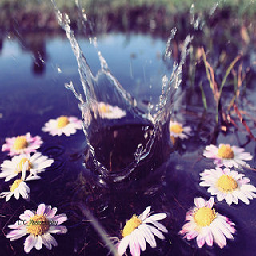

In [37]:
img

In [40]:
x = image.img_to_array(img)

In [39]:
x

array([[[138., 132., 120.],
        [131., 127., 115.],
        [127., 128., 114.],
        ...,
        [165., 168., 141.],
        [146., 156., 129.],
        [149., 162., 134.]],

       [[136., 132., 121.],
        [126., 124., 112.],
        [112., 114., 101.],
        ...,
        [181., 184., 163.],
        [142., 152., 128.],
        [127., 139., 117.]],

       [[131., 128., 121.],
        [119., 119., 111.],
        [103., 104.,  96.],
        ...,
        [147., 151., 134.],
        [132., 141., 124.],
        [126., 137., 120.]],

       ...,

       [[ 27.,  11.,  40.],
        [ 27.,  11.,  40.],
        [ 27.,  11.,  40.],
        ...,
        [ 53.,  25.,  86.],
        [ 53.,  25.,  86.],
        [ 55.,  26.,  90.]],

       [[ 27.,  11.,  40.],
        [ 25.,   9.,  38.],
        [ 25.,   9.,  38.],
        ...,
        [ 54.,  26.,  87.],
        [ 52.,  24.,  85.],
        [ 51.,  25.,  88.]],

       [[ 24.,   9.,  38.],
        [ 23.,   8.,  37.],
        [ 23.,  

In [41]:
x.ndim

3

In [42]:
x = np.expand_dims(x,axis= 0)

In [43]:
x.ndim

4

In [44]:
pred = model.predict(x)

In [ ]:
pred

In [45]:
hi = ["daisy","dandelion","rose","sunflower","tulip"]

In [46]:
np.argmax(pred)

0

In [47]:
hi[np.argmax(pred)]

'daisy'